,CHHCO,HypE,MOEAD,MOMBI2,NSGAII,NSGAIII,SPEA2,SPEA2SDE,ThetaDEA,Sum
0,19.721554,17.538342,17.382627,17.040277,17.436831,17.405850,17.103534,17.265362,17.975579,139.148403
1,19.678654,17.466759,17.331296,16.907201,17.429031,17.383868,17.020754,17.210728,17.900778,138.650414
2,19.702449,17.490651,17.244612,17.068097,17.466691,17.467271,16.931817,17.256244,17.981347,138.906729
3,19.706743,17.497019,17.500802,17.123978,17.576338,17.443468,16.916877,17.201208,17.986887,139.246577
4,19.670974,17.501042,17.382896,17.102947,17.624201,17.404240,16.923083,17.162242,17.929924,139.030575
5,19.757584,17.492904,17.326132,16.972936,17.552376,17.418557,16.889048,17.159339,17.933016,138.744308
6,19.711898,17.460541,17.389829,16.992995,17.572311,17.427477,16.873233,17.224205,17.980290,138.920881
7,19.701861,17.342239,17.414393,17.035947,17.548635,17.346431,16.919574,17.153941,17.948922,138.710080
8,19.716496,17.363969,17.342172,17.077322,17.553986,17.291406,16.918569,17.187140,17.958681,138.693244
9,19.715902,17.347049,17.418624,17.018013,17.605237,17.311099,16.919962,17.154182,17.946490,138.720656


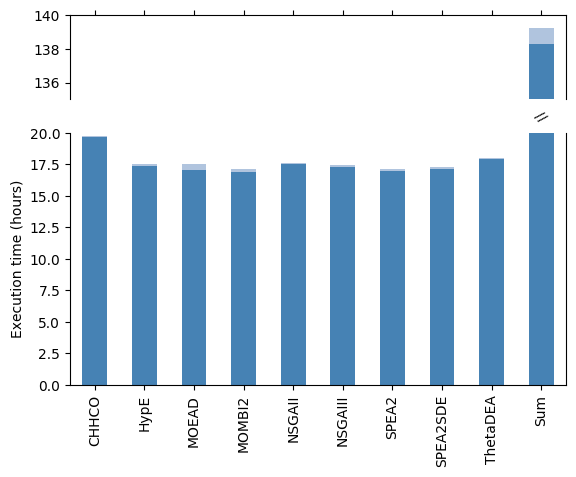

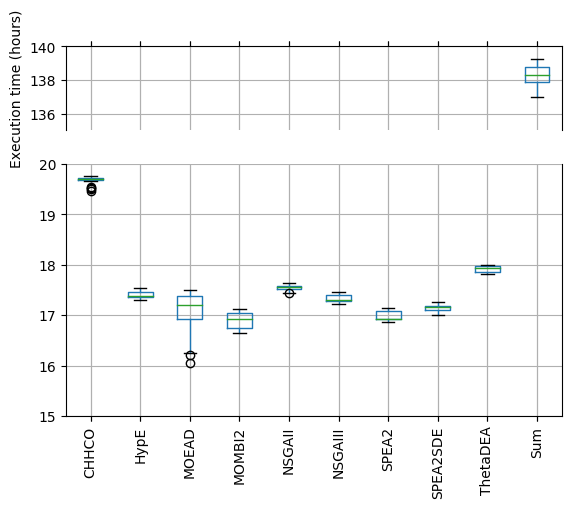

In [41]:
import pandas as pd

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('default')



algorithms=["CHHCO", "HypE", "MOEAD", "MOMBI2", "NSGAII", "NSGAIII", "SPEA2", "SPEA2SDE", "ThetaDEA"]
# algorithms=["ThetaDEA", "NSGAII"]

dflist = []
for alg in algorithms:
    base='../experiment/pc5/ECSymposium2019CompetitionMethodology/5/data/%s/WindTurbineDesign/TIME'%(alg)
    alglist = []
    for i in range(21):
        df = pd.read_csv("%s%s.tsv"%(base, i), header=None)
        df.columns = [alg]
        df[alg] = df[alg] / 3.6e+6 # milliseconds to hours
        alglist.append(df)
    dfalg = pd.concat(alglist)
    dfalg.reset_index(drop=True, inplace=True)
    dflist.append(dfalg)
df = pd.concat(dflist, axis=1)
moeasdf = df.filter(["HypE", "MOEAD", "MOMBI2", "NSGAII", "NSGAIII", "SPEA2", "SPEA2SDE", "ThetaDEA"], axis=1)
df['Sum'] = moeasdf.sum(axis=1)
display(df)

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})

ax = df.max().plot.bar(rot=90, color="lightsteelblue", ax=ax)
ax2 = df.max().plot.bar(rot=90, color="lightsteelblue", ax=ax2)
ax = df.mean().plot.bar(rot=90, color="steelblue", ax=ax)
ax2 = df.mean().plot.bar(rot=90, color="steelblue", ax=ax2)
ax.set_ylim(135,140)
ax2.set_ylim(0,20)
ax2.text(8.85, 21, "//", rotation=90+45)
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax2.set_ylabel("Execution time (hours)")
plt.show()

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
ax = df.boxplot(rot=90, ax=ax)
ax2 = df.boxplot(rot=90, ax=ax2)
ax.set_ylabel("Execution time (hours)")
ax.set_ylim(135,140)
ax2.set_ylim(15,20)
# ax2.text(9.85, 21, "//", rotation=90+45)
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
plt.show()